# Klasifikasi Gambar Batu Gunting Kertas

Nama : Yulian Aznal Hakiky






In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
print(tf.__version__)

2.8.2


In [2]:
# !wget --no-check-certificate \
#   https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip \
#   -O /tmp/rockpaperscissors.zip

In [3]:
# proses ekstraksi file zip
# import zipfile

# local = '/tmp/rockpaperscissors.zip'
# zip_rps = zipfile.ZipFile(local, 'r')
# zip_rps.extractall('/tmp')
# zip_rps.close()

In [4]:
import os

TRAIN_DIR = '/tmp/rockpaperscissors/rps-cv-images/'
# os.remove(os.path.join(TRAIN_DIR, 'README_rpc-cv-images.txt')) # Hapus readme
os.listdir(TRAIN_DIR)


['rock', 'scissors', 'paper']

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range = 0.2,
    fill_mode = 'nearest',
    validation_split=0.4)

train_generator = datagen.flow_from_directory(
    TRAIN_DIR, 
    subset='training',
    target_size= (32,32),
    batch_size=1,
    class_mode='categorical',
    shuffle=True,
    seed = 1
)

val_generator = datagen.flow_from_directory(
    TRAIN_DIR,
    subset='validation',
    target_size= (32,32),
    batch_size=1,
    class_mode='categorical',
    shuffle=True,
    seed = 1
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


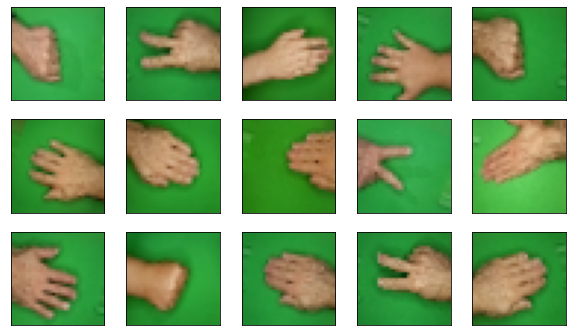

In [6]:
plt.figure(figsize=(10,10))
for i in range(15):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(val_generator[i][0][0])
plt.show()

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (2, 2), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (2, 2), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (2, 2), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (2, 2), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 31, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 128)         32896     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 128)        0

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['accuracy'])

In [9]:
# Train the model
history = model.fit(train_generator, epochs=20, batch_size=4, validation_data=val_generator)

Epoch 1/20
1314/1314 [==============================] - 26s 18ms/step - loss: 1.0639 - accuracy: 0.4186 - val_loss: 0.9666 - val_accuracy: 0.6121
Epoch 2/20
1314/1314 [==============================] - 16s 12ms/step - loss: 0.6232 - accuracy: 0.7390 - val_loss: 0.2396 - val_accuracy: 0.9359
Epoch 3/20
1314/1314 [==============================] - 16s 13ms/step - loss: 0.2757 - accuracy: 0.9117 - val_loss: 0.2036 - val_accuracy: 0.9211
Epoch 4/20
1314/1314 [==============================] - 17s 13ms/step - loss: 0.2013 - accuracy: 0.9346 - val_loss: 0.1996 - val_accuracy: 0.9314
Epoch 5/20
1314/1314 [==============================] - 17s 13ms/step - loss: 0.1524 - accuracy: 0.9444 - val_loss: 0.1974 - val_accuracy: 0.9405
Epoch 6/20
1314/1314 [==============================] - 18s 14ms/step - loss: 0.1443 - accuracy: 0.9521 - val_loss: 0.1242 - val_accuracy: 0.9703
Epoch 7/20
1314/1314 [==============================] - 17s 13ms/step - loss: 0.1146 - accuracy: 0.9635 - val_loss: 0.0826 -

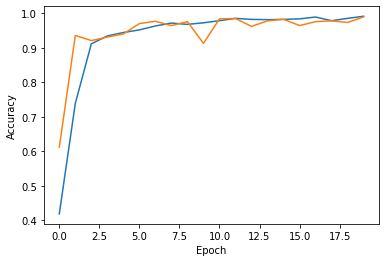

In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

Saving kekuatan amarah.jpg to kekuatan amarah (4).jpg
kekuatan amarah.jpg
rock


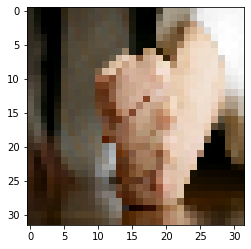

In [15]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()
class_name = ['paper', 'rock', 'scissors']
for fn in uploaded.keys():

  path = '/content/' + fn 
  img = image.load_img(path, target_size =(32,32))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images)
  
  print(fn)
  if classes[0][0] : print(class_name[0])
  if classes[0][1] : print(class_name[1])
  if classes[0][2] : print(class_name[2])